Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо.
* Молодец, что структурируешь ноутбук, приятно проверять такие работы.
* Интересная статья про одну из метрик: <a href="https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/">ссылка</a>.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Привет! Спасибо, что проверил мой проект.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
display(df.head())
display(df.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен.
</div>

In [3]:
df['Tenure'] = df['Tenure'].fillna(-1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Заполнить пропуски таким образом – хорошее решение.
</div>

In [4]:
#использую прямое кодирование, чтобы преобразовать категориальные признаки в численные
data_ohe = pd.get_dummies(df[['Geography', 'Gender']], drop_first = True)
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1)
data = pd.concat([df, data_ohe], axis = 1)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


<div class="alert alert-block alert-success">
<b>Успех:</b> В данном случае OHE – наиболее подходящий метод для кодировки категориальных данных. Согласен, что эти колонки нам не нужны.
</div>

In [5]:
#разбиваю выборку на обучающую, тестовую и валидационную
train, test = train_test_split(data, test_size = 0.2, random_state = 12345)

features = train.drop(['Exited'], axis = 1)
target = train['Exited']

features_train, features_val, target_train, target_val = train_test_split(features, target, test_size = 0.2, random_state = 12345)

features_test = test.drop(['Exited'], axis = 1)
target_test = test['Exited']

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано правильно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно, чтобы размеры полученных наборов были напечатаны. Иногда, это помогает избежать ошибок.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Сделал.
</div>

In [6]:
print(features_train.shape)
print(features_val.shape)
print(target_train.shape)
print(target_val.shape)
print(features_test.shape)
print(target_test.shape)

(6400, 11)
(1600, 11)
(6400,)
(1600,)
(2000, 11)
(2000,)


<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

In [7]:
#стандартизирую данные
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[columns])

features_train[columns] = scaler.transform(features_train[columns])
features_val[columns] = scaler.transform(features_val[columns])
features_test[columns] = scaler.transform(features_test[columns])

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на тренировочной чатси данных!
</div>

## Исследование задачи

In [8]:
#Баланс классов
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(5093, 11)
(1307, 11)
(5093,)
(1307,)


LogisticRegression

In [9]:
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
predict = model.predict(features_val)
print(f'f1 score = {f1_score(target_val, predict)}')
print(f'precision score = {precision_score(target_val, predict)}')
print(f'recall score = {recall_score(target_val, predict)}')

f1 score = 0.30660377358490565
precision score = 0.5371900826446281
recall score = 0.2145214521452145


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> AUC-ROC нужно считать между истинными значениями и вероятностями класса 1, а не самими предсказаниями.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Сделал.
</div>

In [10]:
probabilities_valid = model.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:,1]
print(f'AUC-ROC = {roc_auc_score(target_val, probabilities_one_valid)}')

AUC-ROC = 0.7640276749340316


<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно.
</div>

Tree

In [11]:
#воспользуюсь GridSearchCV
model = DecisionTreeClassifier()
parametrs = {'max_depth': range (1,20)}
grid = GridSearchCV(model, parametrs, cv = 5)
grid.fit(features_train, target_train)
grid.best_params_

#c учетом гиперпараметров
model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = 6)
model_tree.fit(features_train, target_train)
predict = model_tree.predict(features_val)
print(f'f1 score = {f1_score(target_val, predict)}')
print(f'precision score = {precision_score(target_val, predict)}')
print(f'recall score = {recall_score(target_val, predict)}')

f1 score = 0.5176991150442477
precision score = 0.785234899328859
recall score = 0.38613861386138615


In [12]:
probabilities_valid = model_tree.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:,1]
print(f'AUC-ROC = {roc_auc_score(target_val, probabilities_one_valid)}')

AUC-ROC = 0.8148227313093684


<div class="alert alert-block alert-info">
<b>Совет: </b> В параметр scoring класса GridSearchCV желательно было указать нашу целевую функцию.
</div>

RandomForest

In [13]:
#воспользуюсь GridSearchCV
model = RandomForestClassifier()
parametrs = {'max_depth': range (1,20), 'n_estimators': range (10, 25)}
grid = GridSearchCV(model, parametrs, cv = 5)
grid.fit(features_train, target_train)
grid.best_params_

#c учетом гиперпараметров
model_forest = RandomForestClassifier(random_state = 12345, max_depth = 10, n_estimators = 23)
model_forest.fit(features_train, target_train)
predict = model_forest.predict(features_val)
print(f'f1 score = {f1_score(target_val, predict)}')
print(f'precision score = {precision_score(target_val, predict)}')
print(f'recall score = {recall_score(target_val, predict)}')
print(f'AUC-ROC = {roc_auc_score(target_val, predict)}')

f1 score = 0.5511482254697286
precision score = 0.75
recall score = 0.43564356435643564
AUC-ROC = 0.7008595616693511


In [14]:
probabilities_valid = model_forest.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:,1]
print(f'AUC-ROC = {roc_auc_score(target_val, probabilities_one_valid)}')

AUC-ROC = 0.8482789682206463


Для всех моделей f1 мала из-за дисбаланса классов. Поэтому это нужно исправить.

<div class="alert alert-block alert-success">
<b>Успех:</b> Этот шаг был сделан отлично, молодец!
</div>

## Борьба с дисбалансом

In [15]:
# Увеличиваю число наблюдений положительного класса
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, repeat=4)

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что параметр reoeat был выбран так, чтобы классы стали сбалансированными.
</div>

In [16]:
#LogisticRegression
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_upsampled_train, target_upsampled_train)
predict = model.predict(features_val)
print(f'f1 score = {f1_score(target_val, predict)}')
print(f'precision score = {precision_score(target_val, predict)}')
print(f'recall score = {recall_score(target_val, predict)}')

f1 score = 0.4650112866817156
precision score = 0.35334476843910806
recall score = 0.6798679867986799


In [17]:
probabilities_valid = model.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:,1]
print(f'AUC-ROC = {roc_auc_score(target_val, probabilities_one_valid)}')

AUC-ROC = 0.7672872915664735


In [18]:
#tree
#воспользуюсь GridSearchCV
model = DecisionTreeClassifier()
parametrs = {'max_depth': range (1,20)}
grid = GridSearchCV(model, parametrs, cv = 5)
grid.fit(features_train, target_train)
grid.best_params_

#c учетом гиперпараметров
model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = 19)
model_tree.fit(features_upsampled_train, target_upsampled_train)
predict = model_tree.predict(features_val)
print(f'f1 score = {f1_score(target_val, predict)}')
print(f'precision score = {precision_score(target_val, predict)}')
print(f'recall score = {recall_score(target_val, predict)}')

f1 score = 0.47731092436974787
precision score = 0.4863013698630137
recall score = 0.46864686468646866


In [19]:
probabilities_valid = model_tree.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:,1]
print(f'AUC-ROC = {roc_auc_score(target_val, probabilities_one_valid)}')

AUC-ROC = 0.6799723148876183


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Проводить кросс-валидацию на upsampled/downsampled данных – некорректно, так как баланс классов нарушен. Напомню, что внутри кросс-валидации происходит разбиение переданной в нее выборки на треин и валидацию. 
    
В случае upsampling получается так, что в треин и в валидацию (внутри кросс-валидации) вообще попадают одни и те же объекты. 
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> То есть нужно просто передать изначальную обучающую выборку? (что я и сделал)
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Лучше всего подобрать параметры на валидационной выборке (в случае изменения баланса в тренировочной выборке), а не проводить кросс-валидацию вообще. В твоем случае она даст точно такой же результат, как и раньше, так что ее вообще нет смысла перепроводить. Но так как ты проводил кросс-валидацию на исходной выборке, то переходить на изменять эту часть – необязательно.
</div>

In [20]:
#RandomForest
#воспользуюсь GridSearchCV
model = RandomForestClassifier()
parametrs = {'max_depth': range (1,12), 'n_estimators': range (1, 30)}
grid = GridSearchCV(model, parametrs, cv = 5)
grid.fit(features_train, target_train)
grid.best_params_


{'max_depth': 10, 'n_estimators': 27}

In [22]:
#c учетом гиперпараметров
model_forest = RandomForestClassifier(random_state = 12345, max_depth = 11, n_estimators = 28)
model_forest.fit(features_upsampled_train, target_upsampled_train)
predict = model_forest.predict(features_val)
print(f'f1 score = {f1_score(target_val, predict)}')
print(f'precision score = {precision_score(target_val, predict)}')
print(f'recall score = {recall_score(target_val, predict)}')

f1 score = 0.5918367346938775
precision score = 0.5300261096605744
recall score = 0.66996699669967


In [23]:
probabilities_valid = model_forest.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:,1]
print(f'AUC-ROC = {roc_auc_score(target_val, probabilities_one_valid)}')

AUC-ROC = 0.8516887155176581


С учетом баланса классов, лучшая модель - случайный лес.

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, попробуй еще, хотя бы, один метод для борьбы с дисбалансом классов.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Сделал.
</div>

In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_downsampled, target_downsampled)
predict = model.predict(features_val)
print("f1 for logistic regression:", f1_score(target_val, predict))

model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = 19)
model_tree.fit(features_downsampled, target_downsampled)
predict = model_tree.predict(features_val)
print(f'f1 for tree = {f1_score(target_val, predict)}')

model_forest = RandomForestClassifier(random_state = 12345, max_depth = 11, n_estimators = 28)
model_forest.fit(features_downsampled, target_downsampled)
predict = model_forest.predict(features_val)
print(f'f1 for forest = {f1_score(target_val, predict)}')

f1 for logistic regression: 0.47150837988826816
f1 for tree = 0.45555555555555555
f1 for forest = 0.5560975609756097


<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

## Тестирование модели

In [25]:
model_forest = RandomForestClassifier(random_state = 12345, max_depth = 11, n_estimators = 28)
model_forest.fit(features_upsampled_train, target_upsampled_train)
predict = model_forest.predict(features_test)
print(f'f1 score = {f1_score(target_test, predict)}')
print(f'precision score = {precision_score(target_test, predict)}')
print(f'recall score = {recall_score(target_test, predict)}')

f1 score = 0.6324972737186478
precision score = 0.5918367346938775
recall score = 0.6791569086651054


In [26]:
probabilities_valid = model_forest.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:,1]
print(f'AUC-ROC = {roc_auc_score(target_val, probabilities_one_valid)}')

AUC-ROC = 0.8516887155176581


<div class="alert alert-block alert-info">
<b>Совет: </b> Тут можно было еще визуализировать ROC-кривую.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Сделал.
</div>

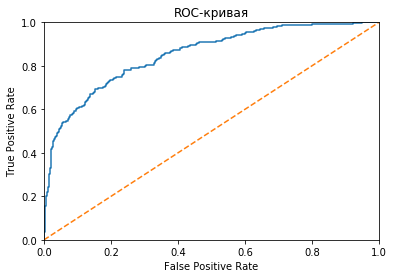

In [27]:
fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

## Вывод

1. Вначале был проведен первичный анализ данных, использовал прямое кодирование, чтобы преобразовать категориальные признаки в численные. Также стандартизировал данные и заполнил пропуски.
2. Были использованы разные модели (логистическая регрессия, дерево решений и случайный лес). Модели до борьбы с дисбалансом показывали низкое значение метрики f1.
3. Произвел upsampling, из-за чего повысилась f1 мера. У лучшей модели (случайный лес) она равна 0.59
4. Проверил модель на тестовой выборке и f1 мера была равна 0.63

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*